# Perceptron

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prettier plots
sns.set()

In [2]:
class Perceptron():
    def __init__(self, n_inputs):
        self.weights = 2 * np.random.random(n_inputs) - 1
        self.output = 0
        self.bias = 0
        self.errors = []
    
    def activation_function(self, x):
        #return (x >= 0).astype(int)  # Step function
        return 1 / (1 + np.exp(-x))  # Sigmoid
    
    def activate(self, inputs):
        local_field = np.dot(self.weights, inputs.T)
        self.output = self.activation_function(local_field) + self.bias
        self.output = np.expand_dims(self.output, 0).T
        return self.output
    
    def train(self, inputs, desired, learning_rate, n_epochs):
        for epoch in range(n_epochs):
            self.activate(inputs)
            errors = desired - self.output
            self.errors.append(errors)
            for (err, inp) in zip(errors, inputs):
                self.weights += learning_rate * err * inp

In [3]:
data_set = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
and_set  = np.array([[0], [0], [0], [1]])
nand_set = np.array([[1], [1], [1], [0]])
or_set   = np.array([[0], [1], [1], [1]])
nor_set  = np.array([[1], [0], [0], [0]])
xor_set  = np.array([[0], [1], [1], [0]])

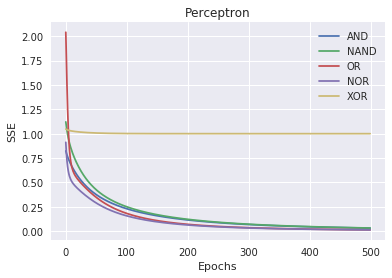

In [4]:
for (desired, title) in zip((and_set, nand_set, or_set, nor_set, xor_set),
                            ("AND", "NAND", "OR", "NOR", "XOR")):    
    p = Perceptron(3)
    p.train(data_set, desired, 0.1, 500)
    plt.plot(np.sum(np.squeeze(p.errors)**2,1), label=title)

plt.title("Perceptron")
plt.ylabel("SSE")
plt.xlabel("Epochs")
plt.legend()
plt.show()